In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from google.colab import files
import io

In [ ]:
data = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = files.upload()

In [ ]:
drive.mount('/content/drive')

In [ ]:
data1 = pd.read_csv('/content/mnist_test.csv')

In [ ]:
data = pd.read_csv('/content/mnist_train.csv')

In [ ]:
print(data.shape)
print(data1.shape)

In [ ]:
print(data.head())
print(data1.head())

In [1]:
#this function shows first few rows

In [ ]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [ ]:
print(train_data.columns)

In [2]:
#understanding the structure of dataset

In [ ]:
train_labels = train_data['5']
train_pixels = train_data.drop('5', axis=1)

test_labels = test_data['7']
test_pixels = test_data.drop('7', axis=1)

In [ ]:
#separating the labels from the features in a dataset target variable from the pixel values for training and testing sets

The accuracy of the random forest classifier is: 0.9698


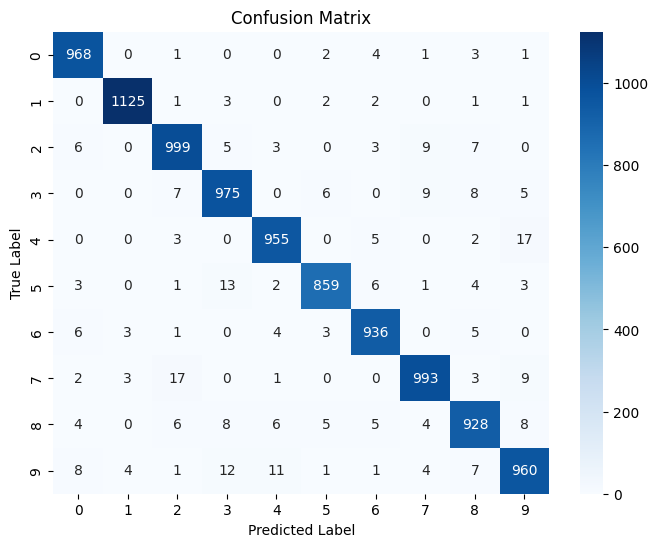

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

# Separate features (X) and target (y)
X = mnist['data']
y = mnist['target']

# Split the data into train and test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Initialize the random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the random forest classifier is:', accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [3]:
#performing classification using a Random Forest classifier on the MNIST dataset

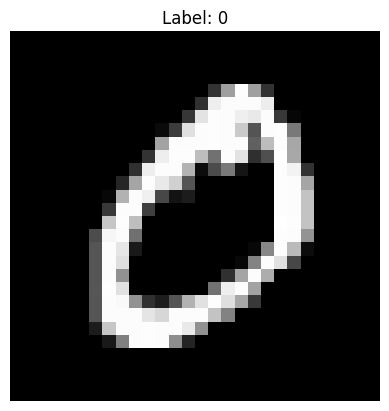

In [ ]:
data_train = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')

X_train = data_train.iloc[:, 1:].values
y_train = data_train.iloc[:, 0].values

X_test = data_test.iloc[:, 1:].values
y_test = data_test.iloc[:, 0].values

image_index = 0
image = X_train[image_index].reshape((28, 28))

plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train[image_index]}")
plt.axis('off')
plt.show()

In [4]:
 #a visualization of the first image from the MNIST training dataset, allowing you to see the handwritten digit and its associated label

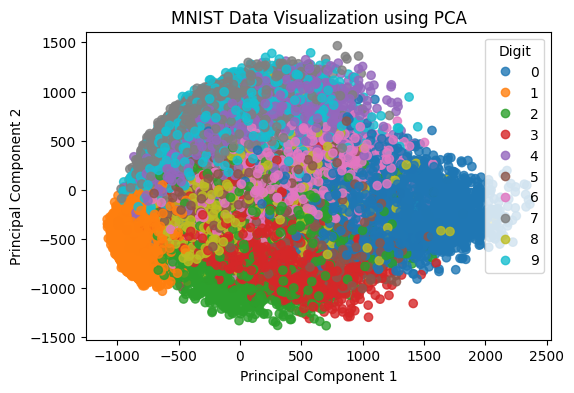

In [ ]:
data_train = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')

X_train = data_train.iloc[:59999, 1:]
y_train = data_train.iloc[:59999, 0]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y_train

plt.figure(figsize=(6, 4))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['label'], cmap='tab10', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Data Visualization using PCA')
plt.legend(handles=scatter.legend_elements()[0], labels=range(10), title='Digit')
plt.show()

In [5]:
#this shows dimensionality reduction using PCA (Principal Component Analysis) and visualizes it in a scatter plot, where each point represents an image with its label.

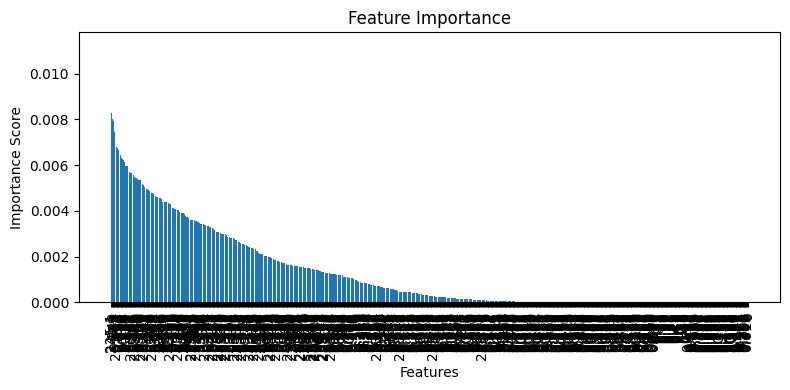

In [ ]:
data_train = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')
X_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:, 0]
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

feature_importance = clf.feature_importances_
feature_names = X_train.columns
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]


plt.figure(figsize=(8, 4))
plt.bar(range(len(feature_importance)), sorted_feature_importance, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
#this code performs classification using a Random Forest classifier then visualizes the importance scores in a bar chart, providing insights

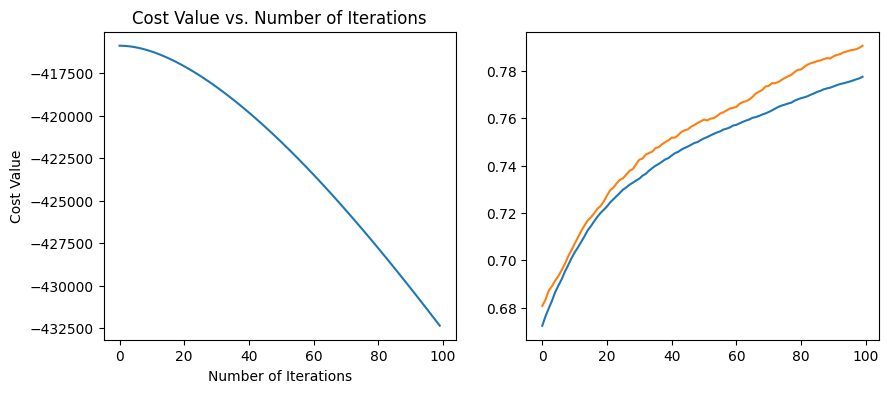

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the MNIST training and test datasets
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Extract the pixel values and labels
train_pixels = train_data.iloc[:, 1:].values
train_labels = train_data.iloc[:, 0].values
test_pixels = test_data.iloc[:, 1:].values
test_labels = test_data.iloc[:, 0].values

# Normalize the pixel values
train_pixels = train_pixels / 255.0
test_pixels = test_pixels / 255.0

# Add bias term to the pixel values
train_pixels = np.insert(train_pixels, 0, 1, axis=1)
test_pixels = np.insert(test_pixels, 0, 1, axis=1)

# Function to calculate softmax probabilities
def softmax(logits):
    exps = np.exp(logits)
    return exps / np.sum(exps, axis=1, keepdims=True)

# Function to calculate the log-likelihood cost
def log_likelihood(X, y, beta):
    logits = np.dot(X, beta)
    log_exp = np.exp(logits)
    log_likelihood = np.sum(logits - np.log(1 + log_exp))
    return log_likelihood

# Function to train the logistic regression classifier
def logistic_regression(X, y, learning_rate, regularization_weight, num_iterations):
    num_classes = len(np.unique(y))
    num_features = X.shape[1]
    beta = np.zeros((num_features, num_classes))
    costs = []
    train_accs = []
    test_accs = []

    for i in range(num_iterations):
        logits = np.dot(X, beta)
        probs = softmax(logits)
        y_one_hot = (y[:, np.newaxis] == np.arange(num_classes)).astype(float)
        cost = log_likelihood(X, y_one_hot, beta) + (regularization_weight / (2 * len(X))) * np.sum(beta ** 2)
        costs.append(cost)

        gradient = (1 / len(X)) * np.dot(X.T, probs - y_one_hot) + (regularization_weight / len(X)) * beta
        beta -= learning_rate * gradient

        train_preds = np.argmax(np.dot(X, beta), axis=1)
        train_acc = np.mean(train_preds == y)
        train_accs.append(train_acc)

        test_preds = np.argmax(np.dot(test_pixels, beta), axis=1)
        test_acc = np.mean(test_preds == test_labels)
        test_accs.append(test_acc)

    return beta, costs, train_accs, test_accs

# Set the hyperparameters
learning_rate = 0.01
regularization_weight = 1
num_iterations = 100

# Train the logistic regression classifier
beta, costs, train_accs, test_accs = logistic_regression(train_pixels, train_labels, learning_rate, regularization_weight, num_iterations)

# Plot the cost value, training accuracy, and testing accuracy versus the number of iterations
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_iterations), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Value')
plt.title('Cost Value vs. Number of Iterations')

plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), train_accs, label='Training')
plt.plot(range(num_iterations), test_accs, label='Testing')


In [ ]:
# logistic regression classifier dataset, normalizes the pixel values, adds a bias term, and plots the cost value, training accuracy, and testing accuracy versus the number of iterations.

In [ ]:
import numpy as np
import pandas as pd

# Load the MNIST training and test datasets
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Extract the pixel values and labels
train_pixels = train_data.iloc[:, 1:].values
train_labels = train_data.iloc[:, 0].values
test_pixels = test_data.iloc[:, 1:].values
test_labels = test_data.iloc[:, 0].values

# Normalize the pixel values
train_pixels = train_pixels / 255.0
test_pixels = test_pixels / 255.0

# Add bias term to the pixel values
train_pixels = np.insert(train_pixels, 0, 1, axis=1)
test_pixels = np.insert(test_pixels, 0, 1, axis=1)

# Function to calculate softmax probabilities
def softmax(logits):
    exps = np.exp(logits)
    return exps / np.sum(exps, axis=1, keepdims=True)

# Function to calculate the log-likelihood cost
def log_likelihood(X, y, beta):
    logits = np.dot(X, beta)
    log_exp = np.exp(logits)
    log_likelihood = np.sum(logits - np.log(1 + log_exp))
    return log_likelihood

# Function to train the logistic regression classifier
def logistic_regression(X, y, learning_rate, regularization_weight, num_iterations):
    num_classes = len(np.unique(y))
    num_features = X.shape[1]
    beta = np.zeros((num_features, num_classes))
    costs = []
    train_accs = []
    test_accs = []

    for i in range(num_iterations):
        logits = np.dot(X, beta)
        probs = softmax(logits)
        y_one_hot = (y[:, np.newaxis] == np.arange(num_classes)).astype(float)
        cost = log_likelihood(X, y_one_hot, beta) + (regularization_weight / (2 * len(X))) * np.sum(beta ** 2)
        costs.append(cost)

        gradient = (1 / len(X)) * np.dot(X.T, probs - y_one_hot) + (regularization_weight / len(X)) * beta
        beta -= learning_rate * gradient

        train_preds = np.argmax(np.dot(X, beta), axis=1)
        train_acc = np.mean(train_preds == y)
        train_accs.append(train_acc)

        test_preds = np.argmax(np.dot(test_pixels, beta), axis=1)
        test_acc = np.mean(test_preds == test_labels)
        test_accs.append(test_acc)

    return beta, costs, train_accs, test_accs



In [ ]:
# Set the hyperparameters
learning_rate = 0.01
regularization_weights = [1, 10, 100, 1000]
num_iterations = 100

results_table = []

for regularization_weight in regularization_weights:
    beta, _, _, test_accs = logistic_regression(train_pixels, train_labels, learning_rate, regularization_weight, num_iterations)
    final_test_accuracy = test_accs[-1]
    results_table.append([regularization_weight, final_test_accuracy])

# Print the results table
print("Regularization Weight\tFinal Testing Accuracy")
for row in results_table:
    print(f"{row[0]}\t\t\t{row[1]}")



Regularization Weight	Final Testing Accuracy
1			0.7905790579057905
10			0.7905790579057905
100			0.7904790479047905
1000			0.7900790079007901


In [6]:
#here is logistic regression on the dataset with different regularization weights and prints a results table showing the final testing accuracy for each regularization weight